<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Initial-Visualizations" data-toc-modified-id="Initial-Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Visualizations</a></span><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set Up</a></span><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Imports and Functions</a></span></li><li><span><a href="#Isolating-Areas-of-Interest" data-toc-modified-id="Isolating-Areas-of-Interest-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Isolating Areas of Interest</a></span></li></ul></li><li><span><a href="#Existing-Rooftop-Solar-Installations" data-toc-modified-id="Existing-Rooftop-Solar-Installations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Existing Rooftop Solar Installations</a></span><ul class="toc-item"><li><span><a href="#Basic-Metrics-Bar-Plots" data-toc-modified-id="Basic-Metrics-Bar-Plots-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Basic Metrics Bar Plots</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Maps</a></span></li></ul></li><li><span><a href="#Solar-Potential" data-toc-modified-id="Solar-Potential-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Solar Potential</a></span></li></ul></li></ul></div>

## Background

## Initial Visualizations

### Set Up

#### Imports and Functions

In [43]:
# Define functions for data & viz output locations

def dataDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/data/' + x

def outputDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/output/' + x

In [231]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterstats import zonal_stats
from rasterio import open as r_open
from rasterio.plot import show as r_show 
from subprocess import Popen

%matplotlib inline

#### Isolating Areas of Interest

In [3]:
# Read MA zip codes shape file

zipsMA = gpd.read_file(dataDir('MAshape/ZIPCODES_NT_POLY.shp'))
zipsMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.601 930766.133, 147572.846 93..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.244 882113.238, 101989.263 88..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.967 933358.562, 106787.233 93..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.642 914027.911, 77229.987 9120..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990 830521.900, 242901.505 83..."
...,...,...,...,...,...,...,...,...,...,...,...
544,01107,SPRINGFIELD,NON UNIQUE,SPRINGFIELD,67000,SPRINGFIELD,HAMPDEN,1.498634,3.881445e+06,10376.718676,"POLYGON ((107846.667 873744.759, 107748.271 87..."
545,02143,SOMERVILLE,NON UNIQUE,SOMERVILLE,62535,SOMERVILLE,MIDDLESEX,1.496683,3.876392e+06,10257.447499,"POLYGON ((234515.542 903600.882, 234513.546 90..."
546,02126,MATTAPAN,NON UNIQUE,MATTAPAN,07000,BOSTON,SUFFOLK,1.913063,4.954811e+06,11393.855139,"POLYGON ((235583.548 891243.299, 235517.614 89..."
547,02723,FALL RIVER,NON UNIQUE,FALL RIVER,23000,FALL RIVER,BRISTOL,1.848472,4.787521e+06,10099.578308,"POLYGON ((231623.910 825614.571, 231616.540 82..."


In [182]:
# Isolate Newton, Milton, Hyde Park, and West Roxbury

isolMA = zipsMA[zipsMA['PC_NAME'].isin(['NEWTON', 'MILTON', 'HYDE PARK', 'WEST ROXBURY'])]
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.005897,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
541,02458,NEWTON,NON UNIQUE,NEWTON,45560,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90..."


<AxesSubplot:>

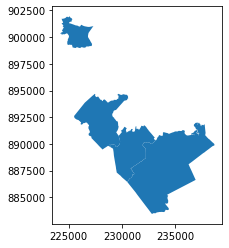

In [5]:
# Plot the areas

isolMA.plot()

### Existing Rooftop Solar Installations

In [13]:
# Read the data into pandas (source: Massachusetts Clean Energy Center)

existPV = pd.read_csv(dataDir('existingPV/existingPVStudyLocations.csv'))
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,2465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,2460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,2466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,2459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,2468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,2132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [14]:
# Need to append '0' to each zipcode entry

existPV['zip'] = '0' + existPV['zip'].astype(str)
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [15]:
existPV.columns

Index(['capacity_kWDC', 'dateInService', 'totalCostwDesignFees', 'totalGrant',
       'city', 'zip', 'county', 'programName', 'facilityType', 'utility',
       '3rdPartyOwned', 'SREC_eligible', 'estAnnualProduction_kWh'],
      dtype='object')

In [16]:
# Some installations received state grants or other incentives, 
# reducing the final cost to the household

existPV['finalCost'] = existPV['totalCostwDesignFees'] - existPV['totalGrant']
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh,finalCost
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0,33850.00
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0,28648.80
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0,18925.25
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0,26988.00
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0,42666.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0,22889.00
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0,20179.00
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0,35585.00
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0,16353.00


In [39]:
def extract_exist_PV_town_name(data, townName):
    
    solarTown = data[data['city'] == townName]
    
    # Metrics for graphing
    
    N            = len(solarTown)
    sumkWcap     = sum(solarTown['capacity_kWDC'])
    sumListCost  = sum(solarTown['totalCostwDesignFees'])
    avgListCost  = solarTown['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarTown['totalGrant'])
    avgGrant     = solarTown['totalGrant'].mean()
    sumFinalCost = sum(solarTown['finalCost'])
    avgFinalCost = solarTown['finalCost'].mean()
    sumkWhProd   = sum(solarTown['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [40]:
def extract_exist_PV_zip(data, zipcode):
    
    solarZip = data[data['zip'] == zipcode]
    
    # Metrics for graphing
    
    N            = len(solarZip)
    sumkWcap     = sum(solarZip['capacity_kWDC'])
    sumListCost  = sum(solarZip['totalCostwDesignFees'])
    avgListCost  = solarZip['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarZip['totalGrant'])
    avgGrant     = solarZip['totalGrant'].mean()
    sumFinalCost = sum(solarZip['finalCost'])
    avgFinalCost = solarZip['finalCost'].mean()
    sumkWhProd   = sum(solarZip['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [116]:
# Extract the solar units already installed in Newton and Milton

PVN = extract_exist_PV_town_name(existPV, 'Newton')
PVM = extract_exist_PV_town_name(existPV, 'Milton')

# Extract the solar units already installed in West Roxbury and Hyde Park

PVW = extract_exist_PV_zip(existPV, '02132')
PVH = extract_exist_PV_zip(existPV, '02136')

# Combine these into a dataframe & set the index correctly

existPVSummary = pd.DataFrame.from_dict([PVN, PVM, PVW, PVH])
existPVSummary = existPVSummary.set_index(pd.Index(['Newton', 'Milton', 
                                                    'West Roxbury', 
                                                    'Hyde Park']))
existPVSummary

,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
Newton,643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
West Roxbury,135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Hyde Park,77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


In [103]:
# Save to a CSV

existPVSummary.to_csv(outputDir('existingPVSummary.csv'))

#### Basic Metrics Bar Plots

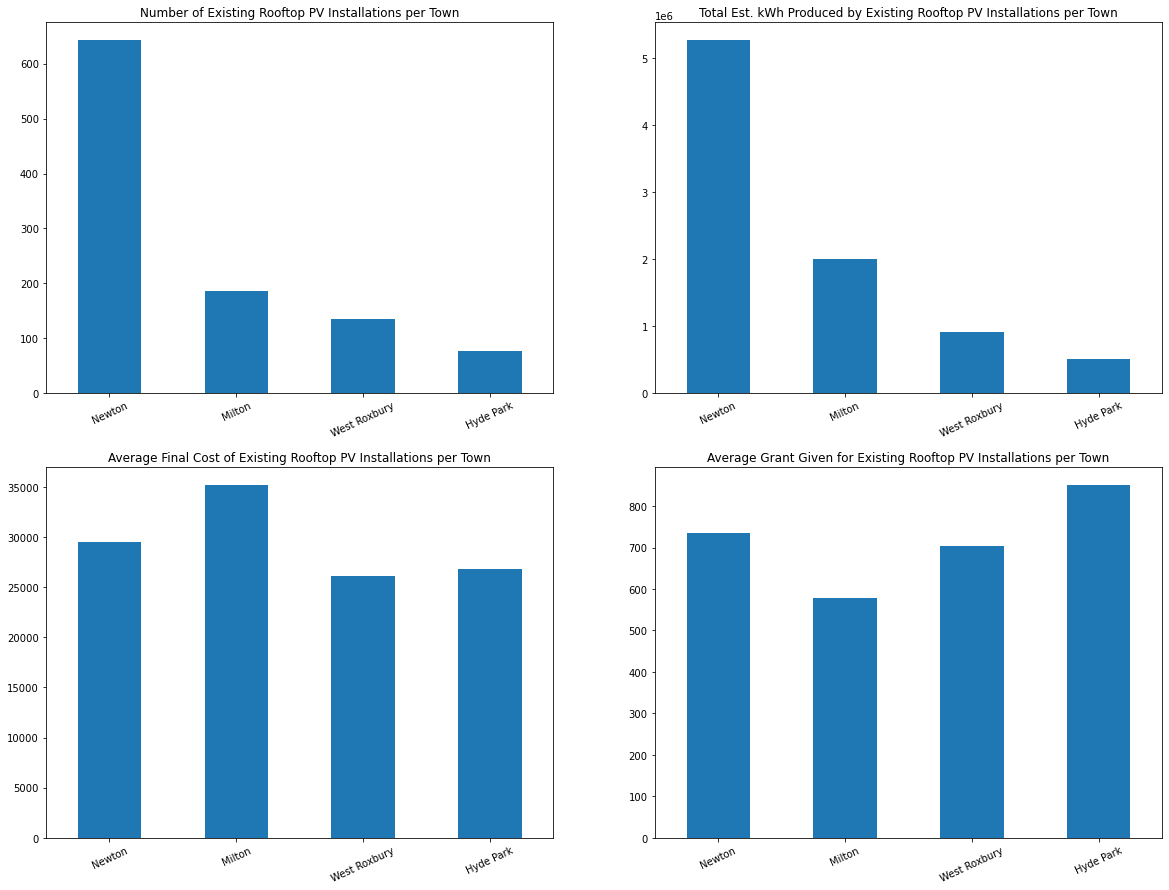

In [77]:
fig1, ax1 = plt.subplots(2, 2)
fig1.set_size_inches(20, 15)

# Plotting N per town

existPVSummary['N'].plot(kind='bar', ax=ax1[0][0])
ax1[0][0].set_xticklabels(labels=ax1[0][0].get_xticklabels(), rotation=25)
ax1[0][0].set_title('Number of Existing Rooftop PV Installations per Town')

# Plotting sumkWhProd per town

existPVSummary['sumkWhProd'].plot(kind='bar', ax=ax1[0][1])
ax1[0][1].set_xticklabels(labels=ax1[0][1].get_xticklabels(), rotation=25)
ax1[0][1].set_title('Total Est. kWh Produced by Existing Rooftop PV Installations per Town')

# Plotting avgFinalCost per town

existPVSummary['avgFinalCost'].plot(kind='bar', ax=ax1[1][0])
ax1[1][0].set_xticklabels(labels=ax1[1][0].get_xticklabels(), rotation=25)
ax1[1][0].set_title('Average Final Cost of Existing Rooftop PV Installations per Town')

# Plotting avgGrant per town

existPVSummary['avgGrant'].plot(kind='bar', ax=ax1[1][1])
ax1[1][1].set_xticklabels(labels=ax1[1][1].get_xticklabels(), rotation=25)
ax1[1][1].set_title('Average Grant Given for Existing Rooftop PV Installations per Town')

# Save image

plt.savefig(outputDir('viz/existingPVBars.png'), dpi=150, format='png')

# *********************** TODO: add bar labels? ******************************

#### Maps

In [204]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.005897,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
541,02458,NEWTON,NON UNIQUE,NEWTON,45560,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90..."


In [218]:
# Need to rearrange isolMA to merge with existPVSummary for plotting

isolMA = isolMA.drop(381)
isolMA.loc[310, 'geometry'] = isolMA.loc[310, 'geometry'][0]
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"POLYGON ((237121.538 891977.684, 237132.296 89..."
541,02458,NEWTON,NON UNIQUE,NEWTON,45560,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90..."


In [219]:
isolMA = isolMA.set_index(pd.Index(['West Roxbury', 'Hyde Park', 'Milton', 
                                   'Newton']))
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Hyde Park,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
Milton,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"POLYGON ((237121.538 891977.684, 237132.296 89..."
Newton,02458,NEWTON,NON UNIQUE,NEWTON,45560,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90..."


In [220]:
# Don't need some of these columns to merge with existPVSummary

isolMA = isolMA[['CITY_TOWN', 'COUNTY', 'AREA_SQMI', 'SHAPE_AREA', 
                       'SHAPE_LEN', 'geometry']]
isolMA

,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
Milton,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"POLYGON ((237121.538 891977.684, 237132.296 89..."
Newton,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90..."


In [178]:
townsPV = isolMA.join(existPVSummary)
townsPV

,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89...",135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89...",77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82
Milton,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"POLYGON ((237121.538 891977.684, 237132.296 89...",186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
Newton,NEWTON,MIDDLESEX,1.970416,5.103354e+06,13327.104521,"POLYGON ((225353.521 901672.403, 225337.127 90...",643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96


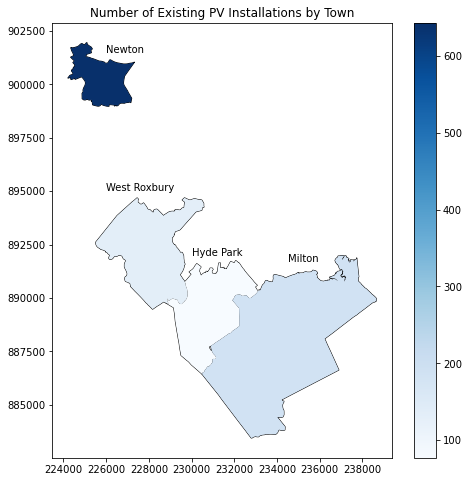

In [177]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8, 8)

townsPV.plot(ax=ax2, color='None', edgecolor='black')
townsPV.plot('N', ax=ax2, cmap='Blues', legend=True)

# Town labels
ax2.text(226000, 901500, 'Newton')
ax2.text(226000, 895000, 'West Roxbury')
ax2.text(230000, 892000, 'Hyde Park')
ax2.text(234500, 891700, 'Milton')

ax2.set_title('Number of Existing PV Installations by Town')

# Save image
plt.savefig(outputDir('viz/existPVNumMap.png'), dpi=150, format='png')

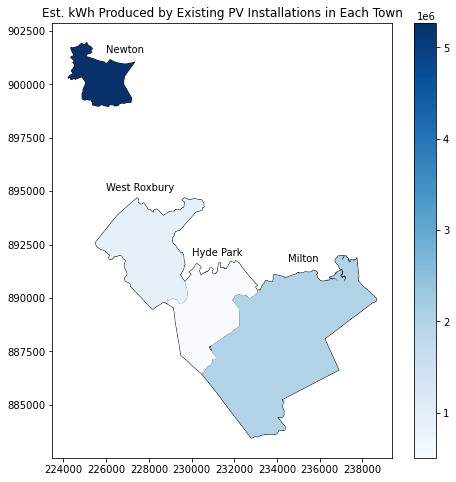

In [181]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8, 8)

townsPV.plot(ax=ax3, color='None', edgecolor='black')
townsPV.plot('sumkWhProd', ax=ax3, cmap='Blues', legend=True)

# Town labels
ax3.text(226000, 901500, 'Newton')
ax3.text(226000, 895000, 'West Roxbury')
ax3.text(230000, 892000, 'Hyde Park')
ax3.text(234500, 891700, 'Milton')

ax3.set_title('Est. kWh Produced by Existing PV Installations in Each Town')

# Save image
plt.savefig(outputDir('viz/existPVkWhMap.png'), dpi=150, format='png')

### Solar Potential

In [ ]:
solarshp = isolMA.to_crs('EPSG:4326')           # solar data is in EPSG:4326 
solarshp.to_file(dataDir('MAshape/solar.shp'))  # saving this to use in QGIS

In [243]:
from_filepath = dataDir('irradiation/USA_GISdata_GlobalSolarAtlas/western-hemisphere/GHI.tif')
to_filepath   = dataDir('irradiation/USA_GISdata_GlobalSolarAtlas/western-hemisphere/reprojSolar.tif')

command = ['gdalwarp', 
           '-r', 'average',
            '-te', '-71.23', '42.1', '-71.0', '42.375',
           '-te_srs', 'EPSG:4326',
           '-of', 'GTiff',
           from_filepath, to_filepath]

Popen(command).wait()

0

In [244]:
solar_file = r_open(to_filepath)
solar = solar_file.read(1).astype(np.float32)

extent = [solar_file.bounds[i] for i in [0, 2, 1, 3]]

<AxesSubplot:>

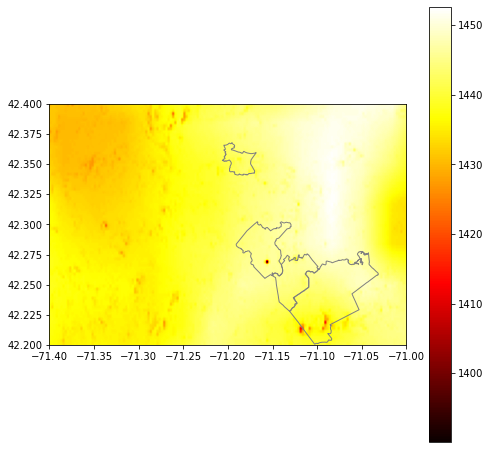

In [247]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(8, 8)

img = ax4.imshow(solar, extent=extent, cmap='hot')
plt.colorbar(img)

solarshp.plot(ax=ax4, color='None', edgecolor='grey')

In [226]:
solarzs = zonal_stats(solarshp, file_path, stats = ['mean', 'count'], 
                     all_touched=True, nodata=-1)

In [227]:
solarzs  # NEED TO REDUCE TIF TO THE AREAS OF INTEREST

[{'mean': 1445.3852389078497, 'count': 293},
 {'mean': 1444.8211122047244, 'count': 254},
 {'mean': 1443.0723396501458, 'count': 686},
 {'mean': 1442.4701473577236, 'count': 123}]

In [ ]:
# TODO: 
#   1. Rewrite README w/ new solar data
#   2. plot $ per kWh produced?
#   3. remove axes from maps?